# Contents

The notebook performs the following tasks on the digits dataset:

1. Linear projection methods (PCA, LDA)
2. Manifold learning, nonlinear dimensionality reduction with UMAP and TSNE
3. Outlier detection with dimensionality reduction
4. Logistic regression, Random Forest classification for digit recognition
5. ConvNET for digit recognition and hyperparameter tuning

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, f1_score
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from keras import layers as tfl

11501568/11490434 [==============================] - 0s 0us/step


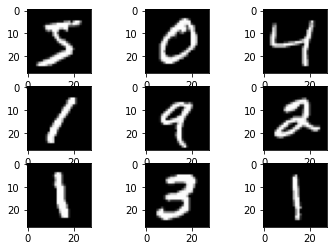

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
for i in range(9):  
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
# reshape to Nx784 matrix
x_train=pd.DataFrame(x_train.reshape(x_train.shape[0],28*28),
                     columns=['pixel_'+str(i) for i in range(1,28*28+1)])
x_test=pd.DataFrame(x_test.reshape(x_test.shape[0],28*28),
                     columns=['pixel_'+str(i) for i in range(1,28*28+1)])

# PCA

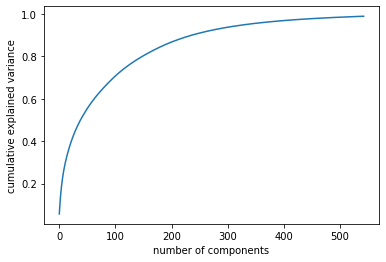

In [ ]:
# Scale the features
scaler=StandardScaler()
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)
# apply PCA for the satisfactory level of explained variance
ncomp=0.99
pca=PCA(n_components=ncomp)
x_train_pc=pd.DataFrame(pca.fit_transform(x_train_sc))
#Plot the explained variance as a function of n_compenents
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
# pipeline with pca
pipe = Pipeline([('scaler', StandardScaler()),('pca',PCA(n_components=0.95)),('logistic', LogisticRegression())])
pipe.fit(x_train, y_train)
print('Overall performance ',pipe.score(x_test, y_test))
print(classification_report(y_test,pipe.predict(x_test)))
print('MultiClass Weighted F1 score ', f1_score(y_test,pipe.predict(x_test),average='weighted'))

Overall performance  0.9265
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.97      1135
           2       0.92      0.90      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.93      0.93      0.93       982
           5       0.91      0.87      0.89       892
           6       0.95      0.95      0.95       958
           7       0.93      0.92      0.92      1028
           8       0.88      0.90      0.89       974
           9       0.92      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000

MultiClass Weighted F1 score  0.926360557499596


In [ ]:
# without pca
pipe = Pipeline([('scaler', StandardScaler()),('logistic', LogisticRegression())])
pipe.fit(x_train, y_train)
print('Overall performance ',pipe.score(x_test, y_test))
print(classification_report(y_test,pipe.predict(x_test)))
print('MultiClass Weighted F1 score ', f1_score(y_test,pipe.predict(x_test),average='weighted'))

Overall performance  0.9246
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.94      0.93      0.94       982
           5       0.90      0.87      0.88       892
           6       0.95      0.95      0.95       958
           7       0.93      0.92      0.93      1028
           8       0.88      0.89      0.88       974
           9       0.91      0.92      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

MultiClass Weighted F1 score  0.9244449968435736


#LDA
usually considered as outdated, and is a special case of canonical correltaion analysis. As we will see, it performs the worst among all methods

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=9) # n_comp must be smaller than the number of classes
x_train_ld = lda.fit(x_train_sc, y_train).transform(x_train_sc)
x_test_ld=lda.transform(x_test_sc)
log_model=LogisticRegression()
log_model.fit(x_train_ld,y_train)
print(classification_report(y_test,log_model.predict(x_test_ld)))
print('MultiClass Weighted F1 score ', f1_score(y_test,log_model.predict(x_test_ld),average='weighted'))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       980
           1       0.94      0.96      0.95      1135
           2       0.90      0.86      0.88      1032
           3       0.86      0.87      0.87      1010
           4       0.87      0.91      0.89       982
           5       0.85      0.83      0.84       892
           6       0.92      0.92      0.92       958
           7       0.89      0.87      0.88      1028
           8       0.83      0.82      0.82       974
           9       0.86      0.85      0.85      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

MultiClass Weighted F1 score  0.8863166798672284


# TSNE

1.   finds the probability distribution in high dimensional space
2.   maps data to lower dimensional space where probability of two points being in each other's neighborhood is as much as close to the probability in the higher dimenional space



In [ ]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
tsne=tsne.fit_transform(x_train_sc)


*   n_components (default: 2): Dimension of the embedded space.
*   perplexity (default: 30): The perplexity is related to the number of nearest neighbors that are used in other manifold learning algorithms. Consider selecting a value between 5 and 50.
*  n_iter (default: 1000): Maximum number of iterations for the optimization. Should be at least 250.





Text(0.5, 1.0, 'Visualizing MNIST through t-SNE')

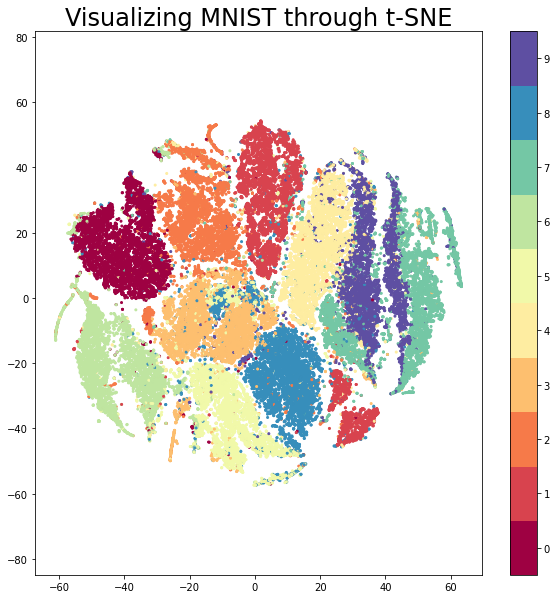

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(tsne[:, 0], tsne[:, 1], s= 4, c=y_train, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing MNIST through t-SNE', fontsize=24)

# UMAP

For additional information see https://umap-learn.readthedocs.io/en/latest/basic_usage.html

$\bullet$ min_dist
The min_dist parameter controls how tightly UMAP is allowed to pack points together.Lower values mean the points will be clustered closely and vice versa.

$\bullet$ n_components
This parameter allows the user to determine the dimensionality of the reduced dimension space.

$\bullet$ metric This parameter essentially controls how distance is computed in the ambient space of the input data.

In [ ]:
!pip install umap-learn

In [ ]:
import umap.umap_ as umap
reducer = umap.UMAP()
reducer.fit(x_train)
embedding = reducer.transform(x_train)
embedding.shape

(60000, 2)

Text(0.5, 1.0, 'UMAP projection of the MNIST dataset')

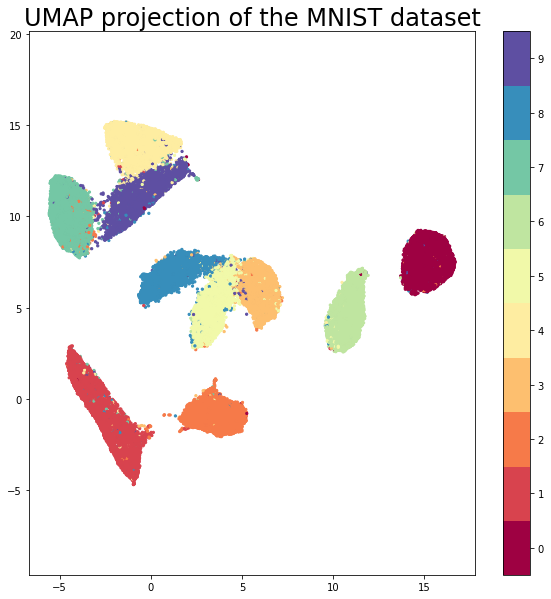

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(embedding[:, 0], embedding[:, 1], c=y_train, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the MNIST dataset', fontsize=24)

In [ ]:
embed_test = reducer.transform(x_test)
log_model=LogisticRegression()
log_model.fit(embedding,y_train)
print(classification_report(y_test,log_model.predict(embed_test)))
print('MultiClass Weighted F1 score ', f1_score(y_test,log_model.predict(embed_test),average='weighted'))

In [ ]:
# Mapping to 3 dimensional space with UMAP
reducer = umap.UMAP(n_components=3)
reducer.fit(x_train)
embed_train = reducer.transform(x_train)
embed_test = reducer.transform(x_test)
log_model=LogisticRegression()
log_model.fit(embed_train,y_train)
print(classification_report(y_test,log_model.predict(embed_test)))
print('MultiClass Weighted F1 score ', f1_score(y_test,log_model.predict(embed_test),average='weighted'))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.93      1.00      0.96      1135
           2       0.98      0.93      0.95      1032
           3       0.95      0.96      0.95      1010
           4       0.97      0.92      0.94       982
           5       0.94      0.95      0.94       892
           6       0.96      0.98      0.97       958
           7       0.94      0.95      0.94      1028
           8       0.98      0.91      0.94       974
           9       0.91      0.94      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

MultiClass Weighted F1 score  0.9515195429416148


$\bullet$ UMAP is faster than t-SNE

$\bullet$ At capturing the global structure of the data, UMAP does a better job than t-SNE and gives better results
$\bullet$ UMAP can also be used for preprocessing while t-SNE does't have major use outside visualisation.

UMAP uses the concept of k-nearest neighbor and optimizes the results using stochastic gradient descent. The algorithm first calculates the distance between the points in high dimensional space and then projects them onto the low dimensional space. It then calculates the distance between these points again in this low dimensional space followed by using Stochastic Gradient Descent to minimize the difference between these distances. For more information see the documentation.

$\bullet$  parametric (neural network) umap embedding can be used for encoding (https://umap-learn.readthedocs.io/en/latest/parametric_umap.html)

## Comparison with more complex model with simple dimensionality reduction

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# we can ignore the features with mean values less than 5
mean_threshold=5
print('Number of features after simple filtering is {}'.format(sum(x_train.mean()>mean_threshold)))
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 350, max_depth = 25, max_features=25,n_jobs=-1, random_state = 25)
rf.fit(x_train.loc[:,x_train.mean()>mean_threshold],y_train)
rf.score(x_test.loc[:,x_train.mean()>mean_threshold],y_test)
print('MultiClass Weighted F1 score ', f1_score(y_test,rf.predict(x_test.loc[:,x_train.mean()>mean_threshold]),average='weighted'))

Number of features after simple filtering is 416
MultiClass Weighted F1 score  0.971283658223108


In [ ]:
import scipy
from time import time
from sklearn.model_selection import GridSearchCV
x_tune = x_train.loc[:,non_zero_cols]

rf_param =  {'n_estimators': [200,250,300,350,400],
             'max_depth': [15,20,23,25,26,30], 
             'max_features': [20,25,30,35,40]}
rf_clf = RandomForestClassifier(n_jobs=-1, random_state = 32)
clf=GridSearchCV(rf_clf,rf_param,n_jobs=-1,cv=6)
clf.fit(x_tune,y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(n_jobs=-1, random_state=32),
             n_jobs=-1,
             param_grid={'max_depth': [15, 20, 23, 25, 26, 30],
                         'max_features': [20, 25, 30, 35, 40],
                         'n_estimators': [200, 250, 300, 350, 400]})

In [ ]:
rf=clf.best_estimator_
rf.fit(x_train.loc[:,non_zero_cols],y_train)
rf.score(x_test.loc[:,non_zero_cols],y_test)
print('MultiClass Weighted F1 score ', f1_score(y_test,rf.predict(x_test.loc[:,non_zero_cols]),average='weighted'))

MultiClass Weighted F1 score  0.9717804031821448


It seems that dimensionality reduction methods is better for visualization purposes, but they perform worse than more complex models for this problem.

## LocalOutlierFactor and UMAP for outlier detection

LocalOutlierFactor takes too much time when the data is high dimensional. Therefore, it is better to reduce dimension using UMAP and then apply it. 

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
outlier_scores = LocalOutlierFactor(contamination=0.001428).fit_predict(embedding_trian)

In [ ]:
outlying_digits = x_train.values[outlier_scores == -1]
outlying_digits.shape

(86, 784)

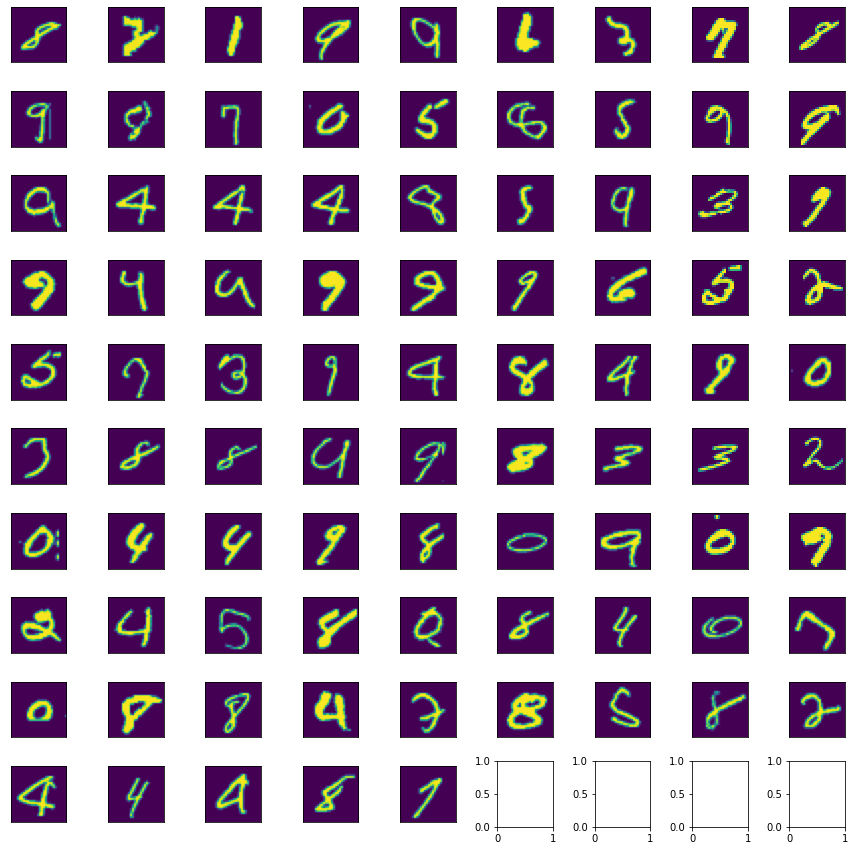

In [ ]:
fig, axes = plt.subplots(10,9, figsize=(12,12))
for i, ax in enumerate(axes.flatten()):
    if i>=outlying_digits.shape[0]:
       break
    else:
      ax.imshow(outlying_digits[i].reshape((28,28)))
      plt.setp(ax, xticks=[], yticks=[])
plt.tight_layout()

# Simple Neural Network example

In [ ]:
ncol=x_train.shape[1]
model=keras.models.Sequential()
model.add(keras.layers.Input(shape = (ncol, )))
model.add(keras.layers.Dense(400,activation='relu'))
model.add(keras.layers.Dense(200,activation='sigmoid'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 400)               314000    
                                                                 
 dense_68 (Dense)            (None, 200)               80200     
                                                                 
 dense_69 (Dense)            (None, 10)                2010      
                                                                 
Total params: 396,210
Trainable params: 396,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train,x_val,y_train,y_val=train_test_split(x_train_sc,y_train,test_size=0.1,random_state=123)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=keras.optimizers.Adam(learning_rate=0.001),metrics='accuracy')
checkpoint=keras.callbacks.ModelCheckpoint('mnist_keras.h5',save_best_only=True)
early_stopping=keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
history=model.fit(x_train,y_train,epochs=10,batch_size=32, validation_data=(x_val,y_val),callbacks=[checkpoint,early_stopping])

Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2079 - accuracy: 0.9377 - val_loss: 0.1300 - val_accuracy: 0.9587
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0886 - accuracy: 0.9721 - val_loss: 0.1107 - val_accuracy: 0.9670
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0575 - accuracy: 0.9826 - val_loss: 0.1003 - val_accuracy: 0.9707
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0404 - accuracy: 0.9874 - val_loss: 0.0966 - val_accuracy: 0.9730
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.0971 - val_accuracy: 0.9715
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0261 - accuracy: 0.9917 - val_loss: 0.0968 - val_accuracy: 0.9738
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0231 - accuracy: 0.9925 - val_loss: 0.0916 - val_accuracy:

In [ ]:
model=keras.models.load_model('mnist_keras.h5')
model.evaluate(x_test_sc,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0971 - accuracy: 0.9742


[0.09706089645624161, 0.9742000102996826]

Simple Sequential model works better than models with dimensionality reduction and LightGBM models (neither models are tuned).

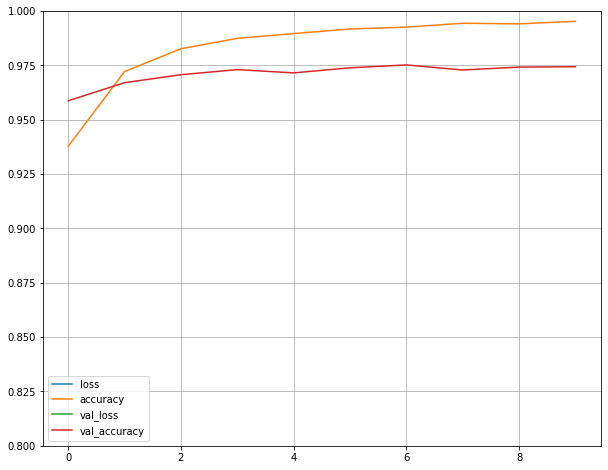

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,8))
plt.grid(True)
plt.ylim(0.8,1)
plt.show()

## Tuning  NN

In [ ]:
def build_model(n_hidden=3, n_neurons=500,learning_rate=1e-3):
  model=keras.Sequential()
  model.add(keras.layers.Input(shape = (ncol, )))
  units=n_neurons
  for layer in range(n_hidden-1):
    model.add(keras.layers.Dense(units,activation='relu'))
    units-=100
  model.add(keras.layers.Dense(50,activation='sigmoid'))
  model.add(keras.layers.Dense(10,activation='softmax'))
  optimizer=keras.optimizers.Adam(learning_rate=learning_rate)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,metrics='accuracy')
  return model

keras_model=keras.wrappers.scikit_learn.KerasRegressor(build_model)

# checkpoint=keras.callbacks.ModelCheckpoint('keras_model.h5',save_best_only=True)
# early_stopping=keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
# keras_model.fit(x_train,y_train,epochs=5,batch_size=32, validation_data=(x_val,y_val),callbacks=[checkpoint,early_stopping])

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

params={
    'n_hidden':[1,2,3],
    'n_neurons':[400,500,600],
    'learning_rate':reciprocal(3e-4,3e-2)
}

clf=RandomizedSearchCV(keras_model,params,n_iter=10,cv=3)
clf.fit(x_train,y_train, epochs=5,
        validation_data=(x_val,y_val))

Epoch 1/5
1125/1125 [==============================] - 6s 5ms/step - loss: 0.2709 - accuracy: 0.9246 - val_loss: 0.1900 - val_accuracy: 0.9428
Epoch 2/5
1125/1125 [==============================] - 6s 5ms/step - loss: 0.1526 - accuracy: 0.9544 - val_loss: 0.1638 - val_accuracy: 0.9482
Epoch 3/5
1125/1125 [==============================] - 6s 5ms/step - loss: 0.1251 - accuracy: 0.9624 - val_loss: 0.1601 - val_accuracy: 0.9520
Epoch 4/5
1125/1125 [==============================] - 5s 5ms/step - loss: 0.1153 - accuracy: 0.9649 - val_loss: 0.1464 - val_accuracy: 0.9545
Epoch 5/5
563/563 [==============================] - 1s 2ms/step - loss: 0.1626 - accuracy: 0.9505
Epoch 1/5
1125/1125 [==============================] - 92s 81ms/step - loss: 0.2737 - accuracy: 0.9234 - val_loss: 0.1815 - val_accuracy: 0.9468
Epoch 2/5
1125/1125 [==============================] - 5s 4ms/step - loss: 0.1508 - accuracy: 0.9558 - val_loss: 0.1719 - val_accuracy: 0.9508
Epoch 3/5
1125/1125 [====================

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f15b08a9950>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f15b0dd2e90>,
                                        'n_hidden': [1, 2, 3],
                                        'n_neurons': [400, 500, 600]})

In [ ]:
clf.best_params_

{'learning_rate': 0.0009304280236974736, 'n_hidden': 2, 'n_neurons': 400}

In [ ]:
# alternatively, we can use keras_tuner library given in https://www.tensorflow.org/tutorials/keras/keras_tuner

# ConvNET

In [ ]:
#load train and test dataset
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    #convert from integers to floats
    trainX = trainX.astype('float32')
    testX = testX.astype('float32')
    # normalize to range 0-1
    trainX = trainX / 255.0
    testX = testX / 255.0
    # encode target variables
    trainY=to_categorical(trainY)
    testY=to_categorical(testY)
    return trainX, trainY, testX, testY
x_train,y_train,x_test,y_test=load_dataset()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, we hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tfl.Conv2D(32,(3,3),strides=(1,1),padding='same')(input_img)
    ## RELU
    A1 = tfl.ReLU()(Z1)
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tfl.MaxPool2D(pool_size=(4,4),strides=(3,3),padding='same')(A1)
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 =tfl.Conv2D(16,(2,2),strides=(1,1),padding='same')(P1)
    ## RELU
    A2 = tfl.ReLU()(Z2)
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tfl.MaxPool2D(pool_size=(4,4),strides=(1,1),padding='same')(A2)
    ## FLATTEN
    F = tfl.Flatten()(P2)
    ## Dense layer
    dense1=tfl.Dense(units=200, activation='relu')(F)
    outputs = tfl.Dense(units=10, activation='softmax')(dense1)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [ ]:
conv_model = convolutional_model((28, 28,1))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 re_lu (ReLU)                (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2064      
                                                                 
 re_lu_1 (ReLU)              (None, 10, 10, 16)        0         
                                                             

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=10, validation_data=test_dataset)

Epoch 1/10
938/938 [==============================] - 14s 4ms/step - loss: 0.2091 - accuracy: 0.9349 - val_loss: 0.1112 - val_accuracy: 0.9648
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0655 - accuracy: 0.9791 - val_loss: 0.0497 - val_accuracy: 0.9842
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.0417 - val_accuracy: 0.9864
Epoch 4/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0394 - accuracy: 0.9873 - val_loss: 0.0356 - val_accuracy: 0.9884
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0329 - accuracy: 0.9892 - val_loss: 0.0312 - val_accuracy: 0.9901
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0281 - accuracy: 0.9912 - val_loss: 0.0275 - val_accuracy: 0.9905
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 0.0346 - val_accuracy: 0.9893
Epoch

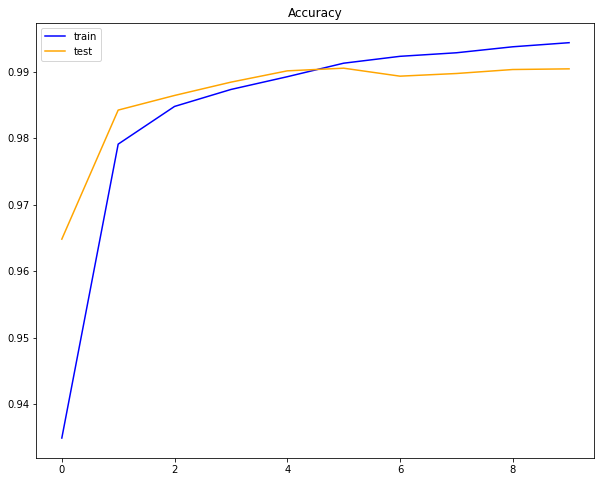

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.legend()
plt.title('Accuracy')
plt.show()